# Data Analysis & Visualization of German Banks Stocks

The major banks I have analyzed and visualized data for includes;
- Deutsche Bank AG
- Commerzbank AG

# Preparation

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data,wb
import datetime
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


In [2]:
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


I will import our stocks data from Google Finance. For this purpose I am using the Python library pandas_datareader.

Let's get started!

In [3]:
start = datetime.datetime(2016,1,1)
end = datetime.date(2017,1,1)

# Importing Data from Google Finance

In [4]:
#Deutsche Bank AG
DB = data.DataReader("DB", 'google', start, end)

#Commerzbank AG
CBK = data.DataReader("CBK", 'google', start, end)

Let's create ticker symbols list for the banks.

In [5]:
tickers = ['DB', 'CBK']

Let's concatenate the data of the banks together using Pandas.

In [6]:
bank_stocks = pd.concat([DB, CBK], axis = 1, keys = tickers)

Setting the column names info.

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Let's check out how our data frame looks like!

In [8]:
bank_stocks.head()

Bank Ticker     DB                                 CBK                    \
Stock Info    Open   High    Low  Close   Volume  Open  High   Low Close   
Date                                                                       
2016-01-04   23.17  23.49  23.02  23.49  2713256  1.65  1.74  1.63  1.72   
2016-01-05   23.61  23.62  23.24  23.48  1264719  1.74  1.74  1.67  1.73   
2016-01-06   23.12  23.28  23.03  23.14  1393341  1.75  1.75  1.61  1.66   
2016-01-07   22.75  23.10  22.67  22.72  2470082  1.56  1.63  1.54  1.54   
2016-01-08   22.82  22.86  22.08  22.10  2341527  1.55  1.62  1.47  1.49   

Bank Ticker          
Stock Info   Volume  
Date                 
2016-01-04   706975  
2016-01-05   282143  
2016-01-06   400626  
2016-01-07   365548  
2016-01-08   518390

In [9]:
bank_stocks.tail()

Bank Ticker     DB                                 CBK                    \
Stock Info    Open   High    Low  Close   Volume  Open  High   Low Close   
Date                                                                       
2016-12-23   18.73  18.79  18.44  18.63  8607428  1.93  2.00  1.92  2.00   
2016-12-27   18.31  18.44  18.20  18.37  4749674  2.02  2.09  2.02  2.09   
2016-12-28   18.20  18.26  17.90  17.92  5007130  2.12  2.18  2.11  2.16   
2016-12-29   18.02  18.06  17.78  17.82  4441555  2.17  2.31  2.16  2.26   
2016-12-30   18.07  18.23  17.88  18.10  4278212  2.31  2.34  2.22  2.34   

Bank Ticker          
Stock Info   Volume  
Date                 
2016-12-23    87632  
2016-12-27   194229  
2016-12-28   250320  
2016-12-29   616455  
2016-12-30   523661

# EDA

Now let's go through some exploratory data analysis on our data set.

First of all let's check the maximum Close stock price for each bank throughout the specified period.

In [10]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
DB     23.49
CBK     2.91
dtype: float64

So the maximum Close stock price of Deutsche Bank is 23.49 and that of Commerzbank is 2.91.

Now let's calculate the returns for each bank. We will call this column "Returns" and add it to our data frame.

In [11]:
returns = pd.DataFrame()

Now let's estimate the returns values by using Pandas.

In [12]:
for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

Alright, the returns have been computed. Let's check out what they look like;

In [13]:
returns.head()

,DBReturn,CBKReturn
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.000426,0.005814
2016-01-06,-0.014480,-0.040462
2016-01-07,-0.018150,-0.072289
2016-01-08,-0.027289,-0.032468


# Visualization

Visualizing our data will give us more information on our data set. Let's create some visuals.

**Pair Plots**

The first plot we will create is the pair plot of the returns for each bank.

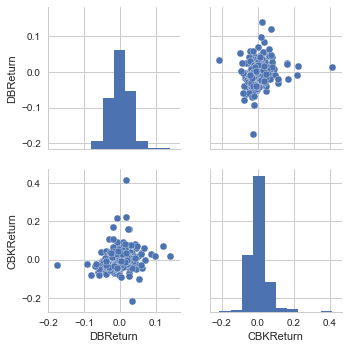

In [14]:
sns.pairplot(returns[1:])

Now let's take a deeper look into the stocks data and find out which dates the banks had the best and worst returns during the specified time period. This might give us an idea as to anything significant happening those days that the stocks were affected in such manner.

So let's see which dates the both banks saw the maximum returns first.

In [15]:
returns.idxmax()

DBReturn    2016-09-30
CBKReturn   2016-03-10
dtype: datetime64[ns]

So Deutsche Bank saw maximum returns on September 30th of 2016 and Commerzbank on March 10th of 2016.

Now we will take a look at the dates when the returns of both banks were the lowest.

In [16]:
returns.idxmin()

DBReturn    2016-06-24
CBKReturn   2016-08-30
dtype: datetime64[ns]

So the minimum returns dates for Deutsche Bank and Commerzbank turns out June 24th and August 30th of 2016 respectively.

Now let's find out the riskier of the two stock prices over the given period of time.

In [17]:
returns.std()

DBReturn     0.032942
CBKReturn    0.054179
dtype: float64

We can see that Commerzbank stocks are the riskier of the two based on the given data in specified time.

Let's dig in a little deeper and check the standard deviation of both halves of year 2016 to see if the stock risk we just calculated holds true for boht halves individually as well.

In [18]:
returns.loc['2016-01-01':'2016-06-30'].std()

DBReturn     0.035369
CBKReturn    0.062178
dtype: float64

In [19]:
returns.loc['2016-07-01':'2016-12-31'].std()

DBReturn     0.030201
CBKReturn    0.045251
dtype: float64

We can see that the stock risk we calculated on annual scale earlier gives the same results for both halves of the year with Commerzbank being the riskier stock of the two.

Now we go towards visualizing the returns of both banks using distribution plots.

**Deutsche Bank Distribution Plot**

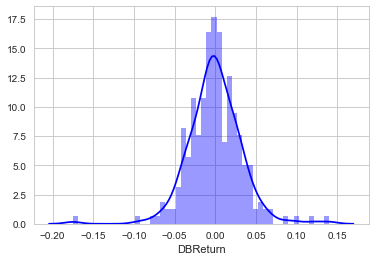

In [20]:
sns.distplot(returns['DBReturn'][1:], color = 'blue', bins = 50)

**Commerzbank Distribution Plot**

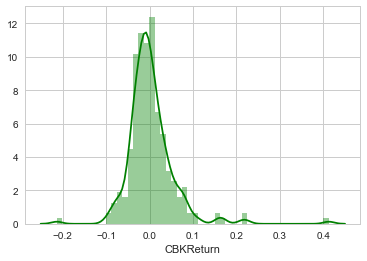

In [21]:
sns.distplot(returns['CBKReturn'][1:], color = 'green', bins = 50)

# Some More Visualization

**Line Plots**

Let's create line plots for both banks showing stock close price for the given year.

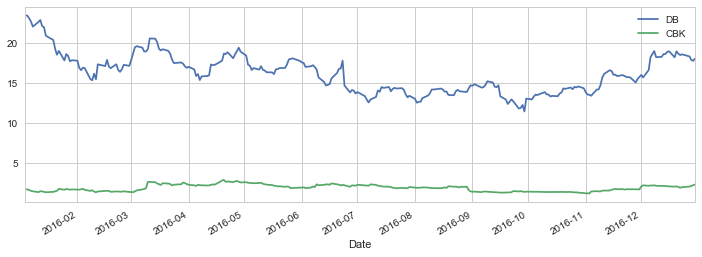

In [22]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (12,4), label = tick)
plt.legend()

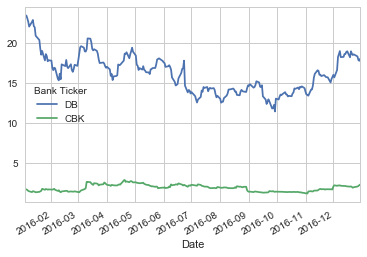

In [23]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).plot()

In [24]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis =1).iplot()

**Moving Averages**

Let's analyze the moving averages for both the stocks in year 2016. We will plot the rolling 30 day average against the close price for both banks' stocks for year 2016.

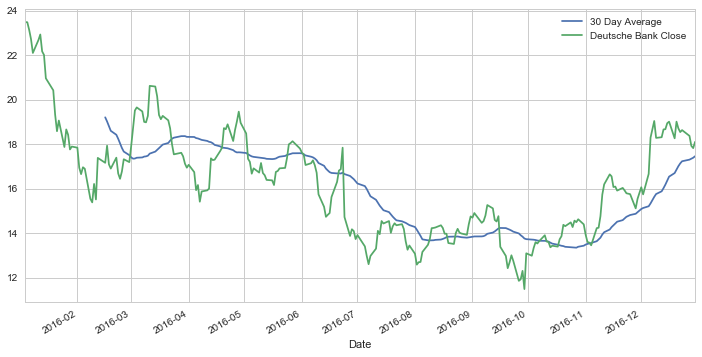

In [25]:
plt.figure(figsize= (12,6))

DB['Close'].loc['2016-01-01':'2016-12-31'].rolling(window = 30).mean().plot(label = '30 Day Average')

DB['Close'].loc['2016-01-01':'2016-12-31'].plot(label = 'Deutsche Bank Close')

plt.legend()

Now let's do the same for Commerzbank.

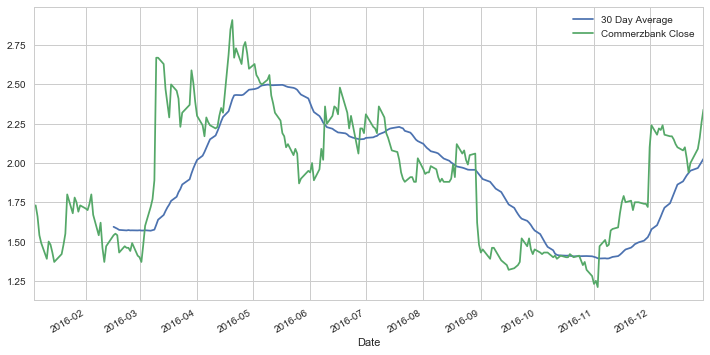

In [26]:
plt.figure(figsize= (12,6))

CBK['Close'].loc['2016-01-01':'2016-12-31'].rolling(window = 30).mean().plot(label = "30 Day Average")

CBK['Close'].loc['2016-01-01':'2016-12-31'].plot(label = "Commerzbank Close")

plt.legend()

**Heat Maps**

**Heat map of the correlation between stocks close price.**

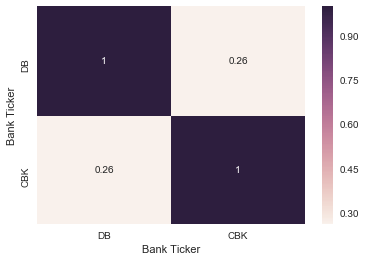

In [27]:
sns.heatmap(bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr(),annot = True)

**Cluster map to cluster the correlations together.**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



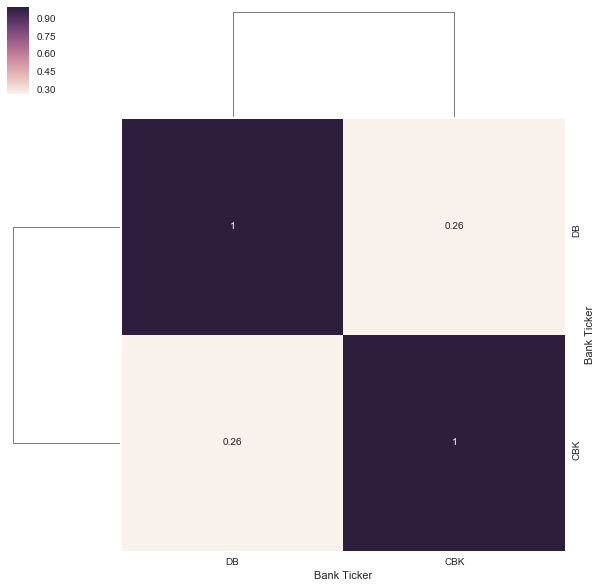

In [28]:
sns.clustermap(bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr(), annot = True)

In [29]:
close_corr = bank_stocks.xs(key = 'Close', level = 'Stock Info', axis =1).corr()
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

**Candle Plots**

In [30]:
DB[['Open', 'High', 'Low', 'Close']].loc['2016-01-01': '2016-12-31'].iplot(kind = 'candle')

In [31]:
CBK[['Open', 'High', 'Low', 'Close']].loc['2016-01-01': '2016-12-31'].iplot(kind = 'candle')

**Simple Moving Averages (SMA) Plots**

In [32]:
DB['Close'].loc['2016-01-01':'2016-12-31'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [33]:
CBK['Close'].loc['2016-01-01': '2016-12-31'].ta_plot(study = 'sma', periods = [13,21,55], title = "Simple Moving Averages")

**Bollinger Band Plots**

In [34]:
DB['Close'].loc['2016-01-01':'2016-12-31'].ta_plot(study = 'boll')

In [35]:
CBK['Close'].loc['2016-01-01':'2016-12-31'].ta_plot(study = 'boll')

**Thank you!**